In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy

In [3]:
X = np.array([6, 7, 11, 15, 18, 21, 23, 29, 31, 37, 39])
y = np.array([29, 23, 29, 14, 21, 25, 7, 7, 13, 0, 3])

np.random.seed(1111)
# Definir semilla de aleatoriedad para reproducibilidad del experimiento

n_muestras = X.shape[0]
#Número de muestra

Implementación propia de algoritmo de Regresión Lineal

In [4]:
def calcular_regresión_lineal(X, y, tasa_aprendizaje=0.001, max_iter=1000000):
    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)

    pendiente = 0
    intersección = 0

    #Por cada iteración
    for iteración in range(max_iter):

        #Obtener aproximación del modelo
        aproximación = np.dot(X, pendiente) + intersección

        # Obtener Gradientes
        dw = 1/(n_muestras) * np.dot(X.T, (aproximación - y))
        db = 1/(n_muestras) * np.sum(aproximación - y)

        # Aplicar técnica del descenso de la gradiente
        pendiente -= tasa_aprendizaje * dw
        intersección -= tasa_aprendizaje * db
    return pendiente, intersección

def predecir(X, y, predicción):
    #Función para predecir y graficar
    plt.scatter(X, y)
    plt.plot(X, predicción, 'r')

def error_estándar(predicción, y):
    #Calcular error estándar
    n = predicción.shape[0]
    total = np.sum(np.square(predicción - y))
    deviación_estándar = np.sqrt(total / n-1)
    error_estándar = deviación_estándar / np.sqrt(n)
    print(f"Error Estándar = {error_estándar}")

def coeficiente_correlación(X, y):
    #Calcular coeficiente de correlación
    covarianza = np.sum((X - np.mean(X)) * (y - np.mean(y))) / X.shape[0]
    X_std = np.std(X)
    y_std = np.std(y)

    correlación = covarianza / (X_std * y_std)
    print(f"Coeficiente de Correlación = {correlación}")

El algoritmo de regresión lineal es dado por la fórmula $\hat{y}=\beta_0 + \beta_1X$ donde:
* $\hat{y}$ es la variable dependiente a estimar
* $X$ es la variable independiente en la posición
* $\beta_0$ es el sesgo o intersección
* $\beta_1$ es la pendiente 

Según Steven C. Chapra (2010) la regresión lineal consiste en obtener una función de aproximación que se ajuste a la forma o a la tendencia general de los datos, sin coincidir necesariamente en todos los puntos. Donde se utiliza una línea recta para caracterizar de manera general la tendencia de los datos sin pasar a través de algún punto específico.

Nótese que $\hat{y}$ es el resultado de una función donde el dominio está representado por la variable independiente $X$, y los valores $\beta_0$ y $\beta_1$ son parámetros que el modelo debe estimar, dicha estimación se basa en el criterio de los mínimos cuadrados. 

Afirma Raymond (2010) que "Una estrategia para ajustar una mejor línea a través de los datos será minimizar la suma de los errores residuales de todos los datos disponibles, el cual es dado por la fórmula $e=\sum_{i=1}^{n} (\hat{y}_i-y_i)^2$ o en su defecto $e=\sum_{i=1}^{n} ((\beta_0 + \beta_1X_i)-y_i)^2$. Este criterio tiene varias ventajas, entre ellas el hecho de que se obtiene una línea única para cierto conjunto de datos."

La manera en la cual los parámetros del modelo se ajustan de manera iterativa al conjunto de datos con base a la función de pérdida $e$ es, entre muchas otras técnicas, el descenso de la gradiente.

Menciona Raymond (2010) que "para determinar los valores $\beta_0$ y $\beta_1$ se deriva la función de pérdida $e$ con respecto a cada uno de los coeficientes". Dicha gradiente apunta hacia la dirección del ascenso más inclinado de la función multivariada, dado que lo que se requiere es minimizar la función de pérdida, se debe ajustar la gradiente para que apunte hacia el descenso más inclinado, esto se consigue aplicando la gradiente para actualizar los parámetros de la siguiente forma: $\beta = \beta - \alpha\nabla$ donde $\nabla = \frac{\partial e}{\partial x}$ y $α$ conocido como tasa de aprendizaje es un parámetro arbitrario o **HIPERPARÁMETRO**

Error Estándar = 1.4803884788144295


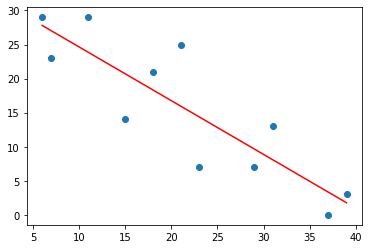

In [5]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

pendiente, intersección = calcular_regresión_lineal(X, y)
#Estimación de parámetros
predicción = np.dot(X, pendiente) + intersección
#Predecir
error_estándar(predicción, y)
predecir(X, y, predicción)

El error estándar según Jerome Friedman (2008) el error estándar del estimado cuantifica la dispersión alrededor de la linea de regresión, y se utiliza para cuantificar la “bondad” de nuestro ajuste, esto es en particular útil para comparar diferentes regresiones.

el error estándar es dado por la fórmula $\frac{DE}{\sqrt{n}}$ donde $DE$ es la deviación estándar de las predicciones y es dado por la fórmula $\sqrt\frac{\sum_{i=1}^{n} (\hat{y_i} - y)^2}{n-1}$.

Afirma Patrick Schober (2018) que "El coeficiente de correlación es usualmente dado por el símbolo $r$ y oscila entre $-1$ y $+1$. Un coeficiente de correlación cerca de $0$, implica una ausencia de relación entre las dos variables. Un coeficiente de correlación cerca de $1$, implica una relación positiva entre las dos variables, lo que significa que, el incremento en una variable está asociado con el incremento de la otra. Un coeficiente de correlación cerca de $-1$ indica una correlación negativa entre ambas variables, el incremento de una variable está asociado con la reducción de la otra variable".

El coeficiente de correlación está dado por la fórmula $ r = \frac{cov(x, y)}{(\sigma_x\sigma_y)}$ donde:

* $cov(x,y)$ es la covarianza entre las variables y se calcula mediante: $\frac{\sum_{i=1}^{N}(x_i-\overline{x})(y_i-\overline{y})}{N}$ donde $\overline{x}$ y $\overline{y}$ son los promedios de cada variable y ${x_i}{y_i}$ son los puntos de datos en el índice $i$

* $\sigma_x$ y $\sigma_y$ son la deviación estándar para cada variable

In [6]:
coeficiente_correlación(X, y)

Coeficiente de Correlación = -0.8641730380309871


Podemos observar que el coeficiente de correlación es negativo, lo que indica una relación descendente entre ambas variables, dicho fenómeno es observable al graficar los datos y, mediante el algoritmo de regresión lineal, puede determinarse que con el aumento de una variable, la otra disminuye

Fuentes bibliográficas:

Steve C. Chapra, Raymond P. Canale, Métodos numéricos para ingenieros, Edición N°5, 2010

Jerome Friedman, Trevor Hastie ,Robert Tibshirani, Elements of Statistical Learning, Edición N°2, 2008

Patrick Schober, Christa Boer, Correlation Coefficients: Appropriate Use and Interpretation, Edición Única, 2018